<a href="https://colab.research.google.com/github/Churanta/AI-Generated-Text-Detector/blob/main/Ression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy tensorflow scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
df = pd.read_csv('job_recession_dataset.csv')

In [4]:
print(df)

      Year Quarter  GDP_Growth  Inflation  Industrial_Production  Job_Market  \
0     2016      Q1    3.866202   5.795522               4.063915       72806   
1     2013      Q1    6.624839   4.008880               0.301156       51465   
2     2022      Q4    3.469627   6.322668              -3.622371       64109   
3     2020      Q3    3.907552   1.415962              -1.309438       53528   
4     2017      Q4    1.586789   1.885589               2.220974       39230   
...    ...     ...         ...        ...                    ...         ...   
2995  2021      Q1    3.154164  12.653804               0.783076       43332   
2996  2020      Q3    6.825993   2.673752               2.006138       10066   
2997  2017      Q4    8.714885  13.569079               1.546320       42313   
2998  2011      Q4    2.374860   5.110002              -4.509416       70857   
2999  2015      Q1    9.789196   5.656680              -3.963961       48900   

      Recession_Indicator  
0          

In [5]:
# Select the features and target
X = df[['GDP_Growth', 'Inflation', 'Industrial_Production', 'Job_Market']]
y = df['Recession_Indicator']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.888


In [10]:
# Create a new DataFrame for prediction
new_data = pd.DataFrame({
    'GDP_Growth': [3.2],
    'Inflation': [6.5],
    'Industrial_Production': [-2.5],
    'Job_Market': [60000]
})

In [11]:
# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [12]:
# Make predictions for the new data
prediction = model.predict(new_data_scaled)

In [13]:
# Print the prediction
if prediction == 1:
    print('Recession is predicted for the next quarter.')
else:
    print('Recession is not predicted for the next quarter.')

Recession is not predicted for the next quarter.


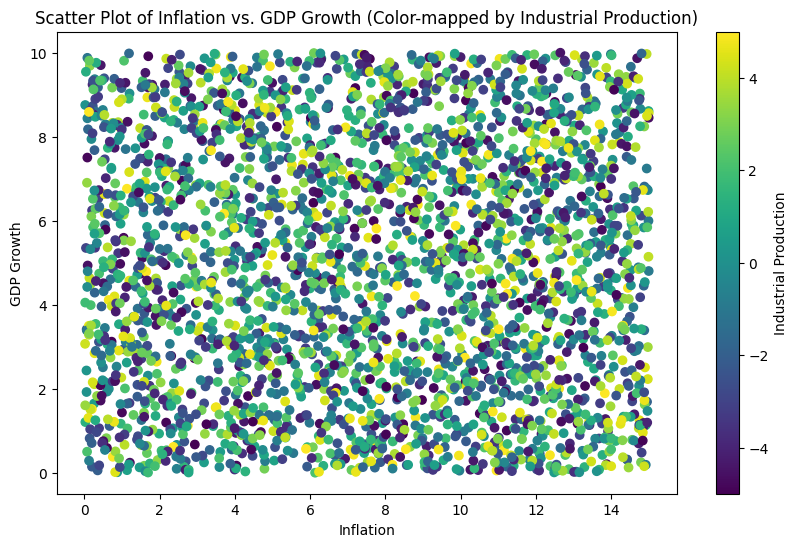

In [15]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Inflation'], df['GDP_Growth'], c=df['Industrial_Production'], cmap='viridis')
plt.xlabel('Inflation')
plt.ylabel('GDP Growth')
plt.title('Scatter Plot of Inflation vs. GDP Growth (Color-mapped by Industrial Production)')
plt.colorbar(label='Industrial Production')
plt.show()







In [16]:
# Extract the relevant columns
quarters = df['Year'].astype(str) + '-' + df['Quarter']
inflation = df['Inflation']
gdp_growth = df['GDP_Growth']
industrial_production = df['Industrial_Production']

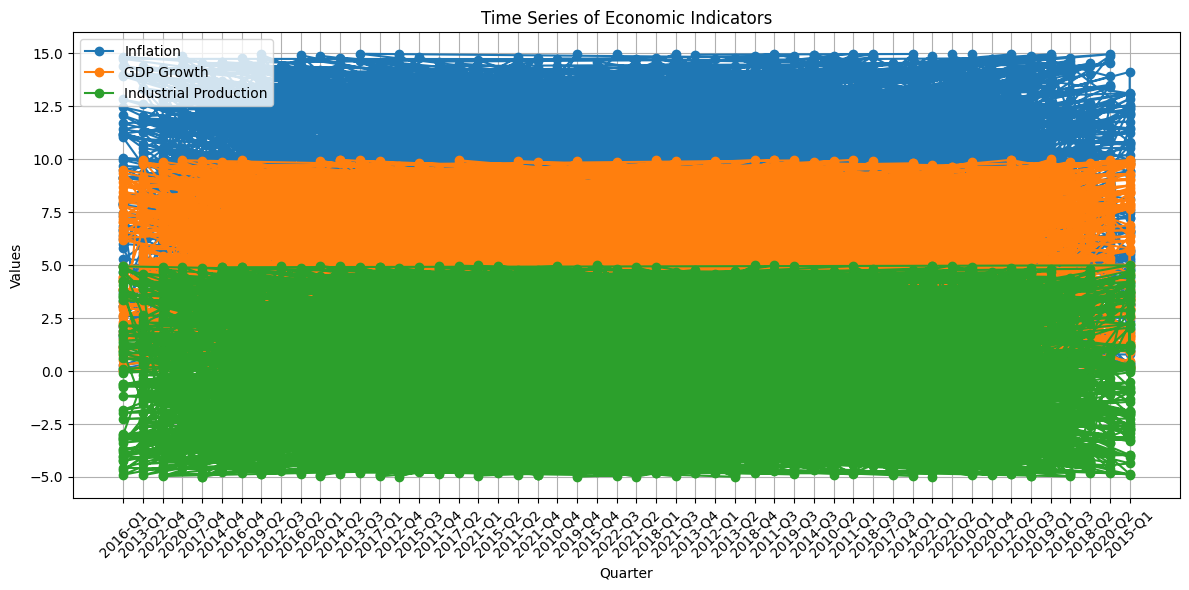

In [18]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(quarters, inflation, label='Inflation', marker='o')
plt.plot(quarters, gdp_growth, label='GDP Growth', marker='o')
plt.plot(quarters, industrial_production, label='Industrial Production', marker='o')

plt.xlabel('Quarter')
plt.ylabel('Values')
plt.title('Time Series of Economic Indicators')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()